In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [101]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#Modelni o'qitish

In [21]:
# Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=15)

# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) # k-ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_predicted = knn.predict(X_test)

#Modelni baholash

In [23]:
#Jaccard index
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predicted)

0.44776119402985076

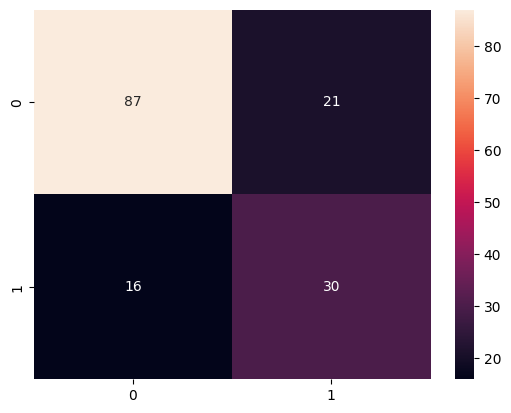

In [24]:
from sklearn.metrics import confusion_matrix
###Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.show()

In [25]:
confusion_matrix(y_test, y_predicted)

array([[87, 21],
       [16, 30]])

In [26]:
#Precision,recall,f1,accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.5882352941176471
recall=0.6521739130434783
f1=0.6185567010309279
accuracy=0.7597402597402597


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       108
           1       0.59      0.65      0.62        46

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.77      0.76      0.76       154



#Cross validation

In [29]:
#Cross validation
from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)

# Modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       500
           1       0.64      0.58      0.61       268

    accuracy                           0.74       768
   macro avg       0.72      0.71      0.71       768
weighted avg       0.74      0.74      0.74       768



Ijobiy qiymatlar salbiydan deyarli ikki barobar ko'p bo'lgani uchun modelimiz bir tomonga og'ib ketgan

#For orqali eng yaxshi k ni topish

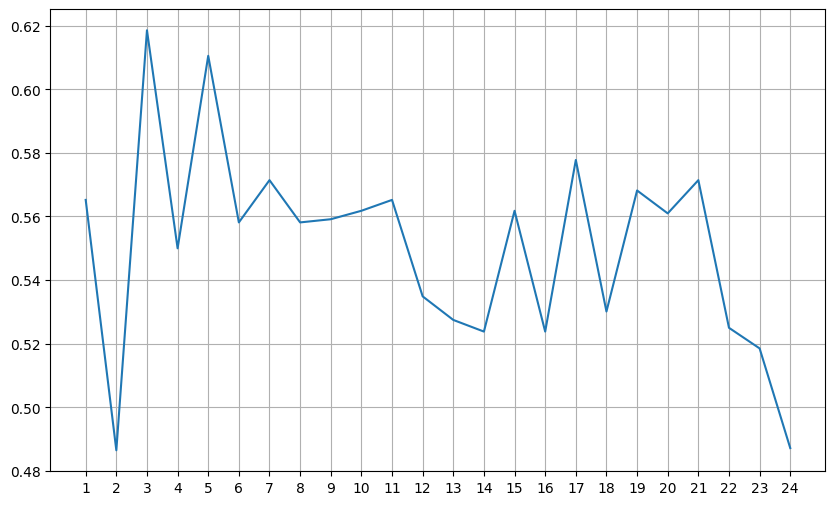

In [30]:
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

#GridSearchCV orqali eng yaxshi k topish

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [32]:
knn_gscv.cv_results_['rank_test_score']

array([24, 23, 15, 18, 22, 21, 17, 16, 20, 19, 14,  9,  4, 11,  3, 12,  1,
        6,  2,  8,  5, 10,  7, 13], dtype=int32)

In [33]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [34]:
knn_gscv.best_score_

0.7669892199303965

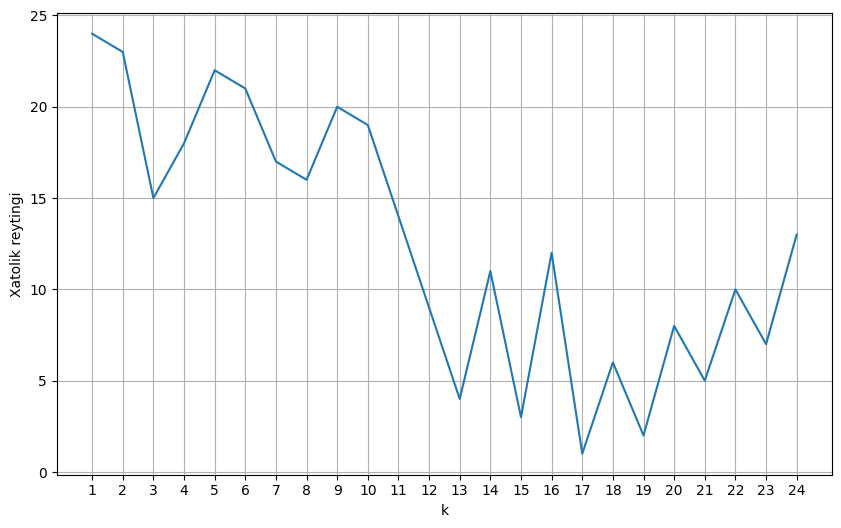

In [35]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

#Keling datasetni balanslaymiz.
Majority klassni kamaytirib ko'ramiz. (undersampling)

In [122]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
new_var = X_train, X_test, y_train, y_test

new_var = train_test_split(X, y, test_size=0.9, random_state=15)

# Apply Random Under Sampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Check the new class distribution
print(f"Resampled class distribution: {dict(zip(*np.unique(y_resampled, return_counts=True)))}")

Resampled class distribution: {0: 241, 1: 241}


In [119]:
len(y_train)

691

In [105]:
y_resampled.value_counts()

Outcome
0    241
1    241
Name: count, dtype: int64

In [106]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17) # k-ni qiymati

knn.fit(X_resampled, y_resampled)

KNeighborsClassifier(n_neighbors=17)

In [107]:
y_predicted = knn.predict(X_test)

In [108]:
#Jaccard index
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_predicted)

0.4489795918367347

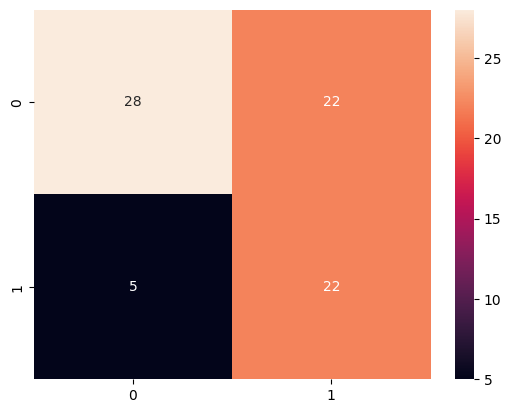

In [109]:
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True)
plt.show()

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.85      0.56      0.67        50
           1       0.50      0.81      0.62        27

    accuracy                           0.65        77
   macro avg       0.67      0.69      0.65        77
weighted avg       0.73      0.65      0.66        77



In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
accuracy = accuracy_score(y_test, y_predicted)
print(f"{precision=}\n{recall=}\n{f1=}\n{accuracy=}")

precision=0.5
recall=0.8148148148148148
f1=0.6197183098591549
accuracy=0.6493506493506493


In [112]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

knn_gscv.best_params_

{'n_neighbors': 17}

In [113]:
knn_gscv.best_score_

0.7669892199303965

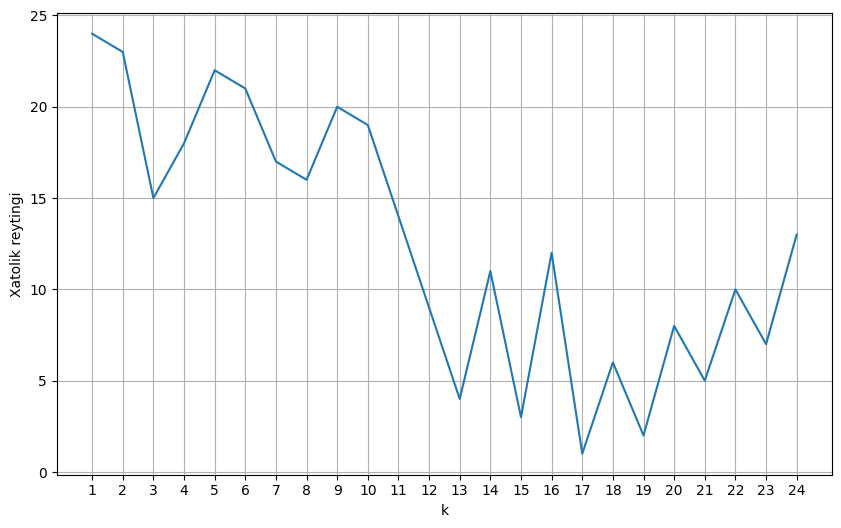

In [114]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()